# TP02: Training an MLP (Keras)

## 01- Loading and preprocessing the MNIST dataset

### 1-1 Loading and reshaping:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear, relu, softmax


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [5]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 784)
y_train: (60000,)
x_test:  (10000, 784)
y_test:  (10000,)


### 1-2 Normalization (x-xmin/xmax-xmin)

In [6]:
x_train=x_train/255
x_test=x_test/255

## 02- Splitting the train set into Train and validations sets (20% for validation)

In [7]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_cv: ' + str(x_cv.shape))
print('y_cv: ' + str(y_cv.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (48000, 784)
y_train: (48000,)
x_cv: (12000, 784)
y_cv: (12000,)
x_test:  (10000, 784)
y_test:  (10000,)


In [9]:
'''print("class label for first image",y_train[0])
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
y_cv=tf.keras.utils.to_categorical(y_cv,10)
print("class label for first image after labeling",y_train[0])'''

'print("class label for first image",y_train[0])\ny_train=tf.keras.utils.to_categorical(y_train,10)\ny_test=tf.keras.utils.to_categorical(y_test,10)\ny_cv=tf.keras.utils.to_categorical(y_cv,10)\nprint("class label for first image after labeling",y_train[0])'

## 03- MLP architecture:
### 01 input layer, 02 hidden layers (128, 64 neurons) and one fully connected layer.
### the RELU activation function for hidden layers and the softmax for the fully connected layer.
### cross-entropy loss function.

In [10]:
tf.random.set_seed(1234) 
def mlp_model():
    mlp_model = keras.Sequential([
    tf.keras.Input(shape=(784,)),    #specify input shape
    Dense(128, activation='relu', name='hidden_layer_1'),
    Dense(64, activation='relu', name='hidden_layer_2'),
    Dense(10, activation='softmax', name='output_layer'),
])
    return mlp_model

In [11]:
batch_sgd_model=mlp_model()

In [12]:
batch_sgd_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
[layer1, layer2, layer3] = batch_sgd_model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 10), b3 shape = (10,)


## 4- Train the designed architecture with Batch SGD

In [14]:
import time
timing_opt={}
start_time=time.time()
batch_sgd_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

batch_history = batch_sgd_model.fit(x_train, y_train, epochs=50, validation_data=(x_cv, y_cv))    
end_time=time.time()
timing_opt['sgd']=end_time-start_time

Epoch 1/50


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




1500/1500 [==============================] - 11s 6ms/step - loss: 0.7709 - accuracy: 0.7944 - val_loss: 0.3653 - val_accuracy: 0.8957
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3246 - accuracy: 0.9078 - val_loss: 0.2831 - val_accuracy: 0.9172
Epoch 3/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2684 - accuracy: 0.9240 - val_loss: 0.2456 - val_accuracy: 0.9287
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2339 - accuracy: 0.9335 - val_loss: 0.2175 - val_accuracy: 0.9392
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2076 - accuracy: 0.9410 - val_loss: 0.1997 - val_accuracy: 0.9444
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1869 - accuracy: 0.9478 - val_loss: 0.1863 - val_accuracy: 0.9467
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1699 - accuracy: 0.9523 - val_loss: 0.1680 - val_accuracy: 0.9517


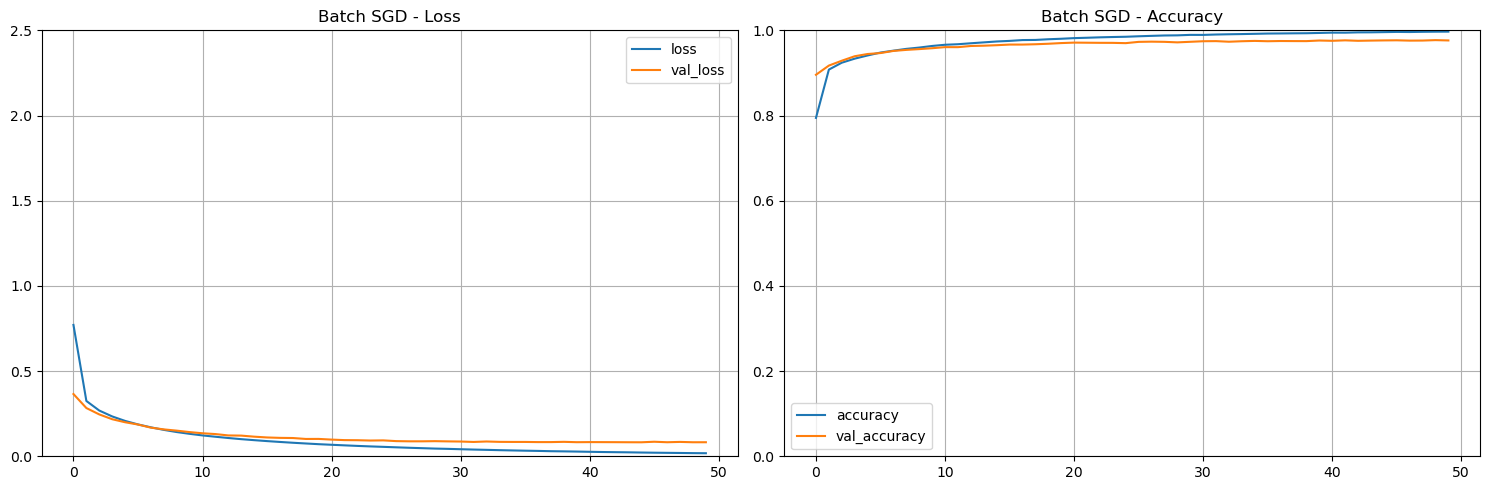

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Plotting loss
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.DataFrame(batch_history.history)[['loss','val_loss']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 2.5)  # set the vertical range for loss
plt.title('Batch SGD - Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
pd.DataFrame(batch_history.history)[['accuracy','val_accuracy']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.title('Batch SGD - Accuracy')

plt.tight_layout()  
plt.show()


## Train the designed architecture with Mini Batch SGD

In [16]:
mini_sgd_model=mlp_model()

In [17]:
import time

timing = {}
start_time = time.time()

mini_sgd_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

history_mini = mini_sgd_model.fit(x_train, y_train, epochs=50, batch_size=64,validation_data=(x_cv, y_cv))  
end_time=time.time()
timing['mini_sgd_model'] = end_time-start_time

Epoch 1/50


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 [==============================] - 5s 5ms/step - loss: 1.0064 - accuracy: 0.7472 - val_loss: 0.4740 - val_accuracy: 0.8716
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4032 - accuracy: 0.8887 - val_loss: 0.3516 - val_accuracy: 0.9028
Epoch 3/50
750/750 [==============================] - 3s 5ms/step - loss: 0.3308 - accuracy: 0.9063 - val_loss: 0.3059 - val_accuracy: 0.9137
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2944 - accuracy: 0.9160 - val_loss: 0.2791 - val_accuracy: 0.9217
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2688 - accuracy: 0.9225 - val_loss: 0.2588 - val_accuracy: 0.9282
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2489 - accuracy: 0.9293 - val_loss: 0.2422 - val_accuracy: 0.9333
Epoch 7/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2324 - accuracy: 0.9342 - val_loss: 0.2281 - val_accuracy: 0.9357
Epoch 8/50
750/75

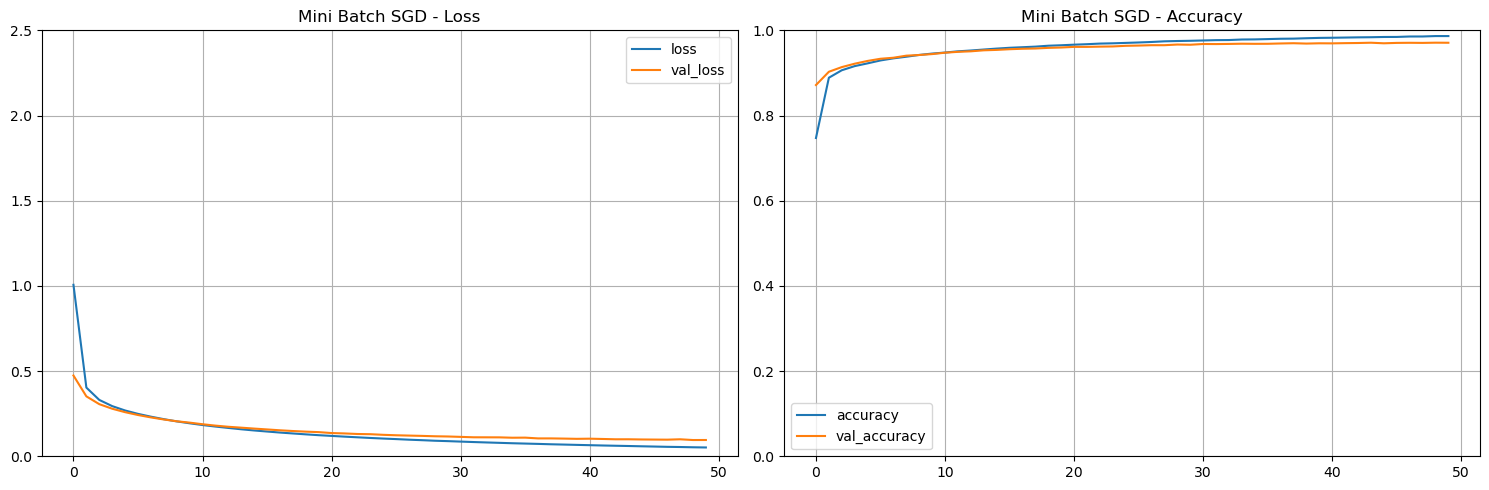

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.DataFrame(history_mini.history)[['loss','val_loss']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 2.5) 
plt.title('Mini Batch SGD - Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
pd.DataFrame(history_mini.history)[['accuracy','val_accuracy']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.title('Mini Batch SGD - Accuracy')

plt.tight_layout()  
plt.show()  

## Train the designed architecture with SGD

In [19]:
sgd_model=mlp_model()
sgd_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

history_sgd= sgd_model.fit(x_train, y_train, epochs=50, batch_size=1,validation_data=(x_cv, y_cv))  

Epoch 1/50


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


48000/48000 [==============================] - 176s 4ms/step - loss: 0.2453 - accuracy: 0.9246 - val_loss: 0.2411 - val_accuracy: 0.9271
Epoch 2/50
48000/48000 [==============================] - 295s 6ms/step - loss: 0.1196 - accuracy: 0.9629 - val_loss: 0.1223 - val_accuracy: 0.9640
Epoch 3/50
48000/48000 [==============================] - 301s 6ms/step - loss: 0.0854 - accuracy: 0.9730 - val_loss: 0.1119 - val_accuracy: 0.9690
Epoch 4/50
48000/48000 [==============================] - 251s 5ms/step - loss: 0.0679 - accuracy: 0.9775 - val_loss: 0.1194 - val_accuracy: 0.9670
Epoch 5/50
48000/48000 [==============================] - 255s 5ms/step - loss: 0.0554 - accuracy: 0.9822 - val_loss: 0.0970 - val_accuracy: 0.9732
Epoch 6/50
48000/48000 [==============================] - 255s 5ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0944 - val_accuracy: 0.9747
Epoch 7/50
48000/48000 [==============================] - 192s 4ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.114

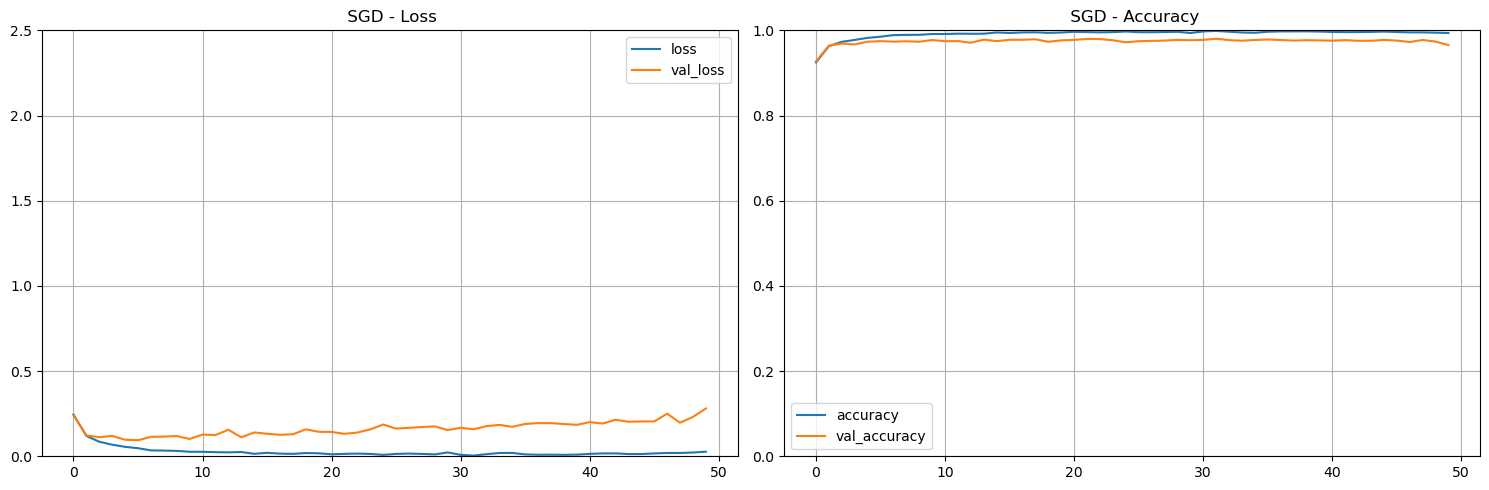

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.DataFrame(history_sgd.history)[['loss','val_loss']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 2.5) 
plt.title(' SGD - Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
pd.DataFrame(history_sgd.history)[['accuracy','val_accuracy']].plot(ax=plt.gca())
plt.grid(True)
plt.gca().set_ylim(0, 1)  
plt.title(' SGD - Accuracy')

plt.tight_layout()  
plt.show()  

## 5- Compare between the training time and the learning curves of mini batch SGD, mini batch SGD with decay (1e-6) and SGD with decay (1e-6) and momentum. 

### mini batch sgd with decay 1e-6

In [43]:
mini_sgd_withdecay_model=mlp_model()
start_time = time.time()
decay_rate = 1e-6
momentum = 0.8
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=1e-6)

mini_sgd_withdecay_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
    metrics=["accuracy"]
)

history_mini_withdecay = mini_sgd_withdecay_model.fit(x_train, y_train, epochs=50, batch_size=64,validation_data=(x_cv, y_cv))  
end_time=time.time()
timing['mini_sgd_withdecay_model'] = end_time-start_time

Epoch 1/50
750/750 [==============================] - 10s 10ms/step - loss: 1.1529 - accuracy: 0.7040 - val_loss: 0.6504 - val_accuracy: 0.8390
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.5790 - accuracy: 0.8530 - val_loss: 0.5347 - val_accuracy: 0.8619
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 0.5208 - accuracy: 0.8661 - val_loss: 0.5080 - val_accuracy: 0.8676
Epoch 4/50
750/750 [==============================] - 9s 12ms/step - loss: 0.5051 - accuracy: 0.8688 - val_loss: 0.4996 - val_accuracy: 0.8693
Epoch 5/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4999 - accuracy: 0.8697 - val_loss: 0.4968 - val_accuracy: 0.8703
Epoch 6/50
750/750 [==============================] - 5s 7ms/step - loss: 0.4982 - accuracy: 0.8701 - val_loss: 0.4958 - val_accuracy: 0.8707
Epoch 7/50
750/750 [==============================] - 5s 7ms/step - loss: 0.4975 - accuracy: 0.8702 - val_loss: 0.4955 - val_accuracy: 0.8707
Epo

### Mini-batch sgd with decay 1e-6 and momentum

In [44]:
sgd_withdecaymomentum_model=mlp_model()
start_time = time.time()
sgd_withdecaymomentum_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule,momentum=momentum, nesterov=False),
    metrics=["accuracy"]
)

history_sgd_withdecaymomentum = sgd_withdecaymomentum_model.fit(x_train, y_train, epochs=50, batch_size=64,validation_data=(x_cv, y_cv))  
end_time=time.time()
timing['minibatchsgd_withdecaymomentum_model'] = end_time-start_time

Epoch 1/50
750/750 [==============================] - 7s 7ms/step - loss: 0.5100 - accuracy: 0.8600 - val_loss: 0.3074 - val_accuracy: 0.9137
Epoch 2/50
750/750 [==============================] - 4s 6ms/step - loss: 0.2891 - accuracy: 0.9178 - val_loss: 0.2744 - val_accuracy: 0.9251
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 0.2676 - accuracy: 0.9251 - val_loss: 0.2657 - val_accuracy: 0.9262
Epoch 4/50
750/750 [==============================] - 5s 7ms/step - loss: 0.2607 - accuracy: 0.9267 - val_loss: 0.2619 - val_accuracy: 0.9278
Epoch 5/50
750/750 [==============================] - 8s 11ms/step - loss: 0.2582 - accuracy: 0.9272 - val_loss: 0.2608 - val_accuracy: 0.9282
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 0.2574 - accuracy: 0.9276 - val_loss: 0.2605 - val_accuracy: 0.9283
Epoch 7/50
750/750 [==============================] - 6s 7ms/step - loss: 0.2570 - accuracy: 0.9278 - val_loss: 0.2603 - val_accuracy: 0.9282
Epoch

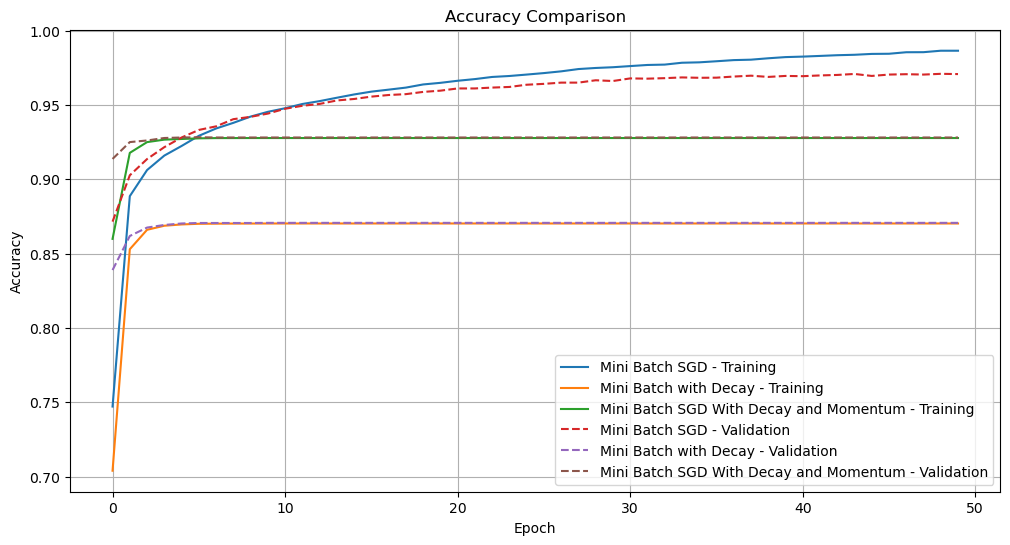

In [45]:

models_data = {
    'Mini Batch SGD': {
        'history': history_mini,
        'timing': timing.get('mini_sgd_model', []),
    },
    'Mini Batch with Decay': {
        'history': history_mini_withdecay,
        'timing': timing.get('mini_sgd_withdecay_model', []),
    },
    'Mini Batch SGD With Decay and Momentum': {
        'history': history_sgd_withdecaymomentum,
        'timing': timing.get('minibatchsgd_withdecaymomentum_model', []),
    },
}

# Plotting accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['accuracy'], label=f'{model_name} - Training')

# Plot validation accuracy
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['val_accuracy'], label=f'{model_name} - Validation', linestyle='dashed')

plt.title('Accuracy Comparison')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


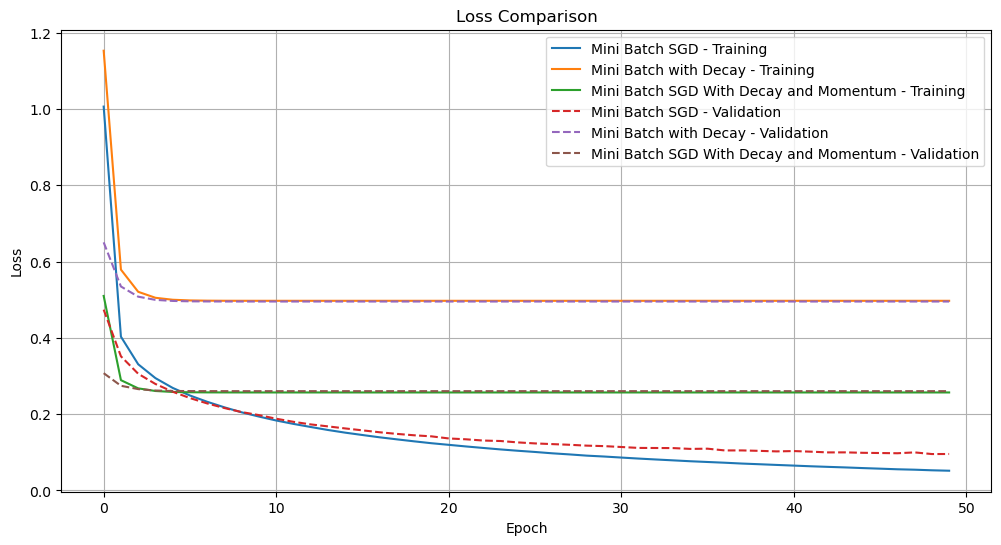

In [46]:
# Plotting loss
plt.figure(figsize=(12, 6))

# Plot training loss
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['loss'], label=f'{model_name} - Training')

# Plot validation loss
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['val_loss'], label=f'{model_name} - Validation', linestyle='dashed')

plt.title('Loss Comparison')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
timing

{'mini_sgd_model': 177.21311616897583,
 'mini_sgd_withdecay_model': 297.15793657302856,
 'minibatchsgd_withdecaymomentum_model': 286.06288290023804}

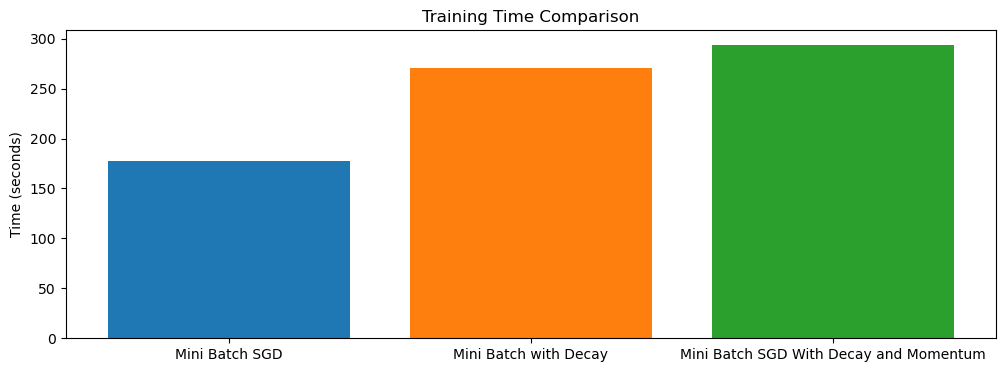

In [42]:
# Plotting timing
plt.figure(figsize=(12, 4))

for model_name, model_data in models_data.items():
    plt.bar(model_name, model_data['timing'])

plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.show()

### R5: The Comparision
The three algorithms compared are: Mini-batch SGD , Mini-batch SGD with decay of 1e-6, Mini Batch SGD with decay of 1e-6 and momentum


- The first algorithm, `Mini-batch SGD`, has a accuracy of **%97**, but has the shortest time of **177 seconds**.
- the second algorithm, `Mini-batch SGD with decay of 1e-6`, has slightly lower accuracy of **87%**, and it takes slightly longer to train at **297.15**  which is significantly longer than the other two algorithms.
- he third algorithm, `SGD with decay of 1e-6 and momentum`, has a significantly accuracy of **%92**, which could indicate that it didn't stuck in a local minimum during training. Moreover, it has training time of ****293.73 seconds**.

Mini-batch SGD with `decay` would `converge` Lower than Mini-batch SGD, and the addition of `momentum` in SGD would improve convergence speed and stability as well.

In conclusion, we can say that Mini-batch SGD would be the `preferred` algorithm among the three, as it achieves a `higher accuracy` than Mini-batch SGD whith Decay and has a relatively `short training time` compared to SGD with decay and momentum.


## 6- Compare between SGD (lr=0.01), Adam (lr=0.001), and RmsProp (lr=0.001) optimizers.

### Adam (lr=0.001)

In [48]:
start_time = time.time()
model_adam = mlp_model()

model_adam.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics=['accuracy'])

history_adam = model_adam.fit(x_train, y_train, epochs=50, validation_data=(x_cv, y_cv))
end_time = time.time()

timing_opt['adam'] = end_time-start_time

Epoch 1/50
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2628 - accuracy: 0.9233 - val_loss: 0.1429 - val_accuracy: 0.9557
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1132 - accuracy: 0.9662 - val_loss: 0.1137 - val_accuracy: 0.9653
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0775 - accuracy: 0.9767 - val_loss: 0.0970 - val_accuracy: 0.9704
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0878 - val_accuracy: 0.9743
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0475 - accuracy: 0.9842 - val_loss: 0.0860 - val_accuracy: 0.9761
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0387 - accuracy: 0.9874 - val_loss: 0.0885 - val_accuracy: 0.9749
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.1101 - val_ac

### Rmsprop (lr=0.001)

In [49]:
start_time = time.time()
model_rmsprop = mlp_model()

model_rmsprop.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
                metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=50,validation_data=(x_cv, y_cv))
end_time = time.time()

timing_opt['rmsprop'] = end_time-start_time

Epoch 1/50
1500/1500 [==============================] - 12s 6ms/step - loss: 0.2619 - accuracy: 0.9240 - val_loss: 0.1398 - val_accuracy: 0.9565
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 0.1097 - val_accuracy: 0.9672
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0848 - accuracy: 0.9753 - val_loss: 0.1024 - val_accuracy: 0.9718
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0664 - accuracy: 0.9806 - val_loss: 0.0922 - val_accuracy: 0.9735
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0538 - accuracy: 0.9845 - val_loss: 0.0968 - val_accuracy: 0.9750
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0448 - accuracy: 0.9866 - val_loss: 0.1070 - val_accuracy: 0.9737
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.1038 - val_accuracy

In [50]:
timing_opt

{'sgd': 360.43256068229675,
 'adam': 542.2714364528656,
 'rmsprop': 419.6663966178894}

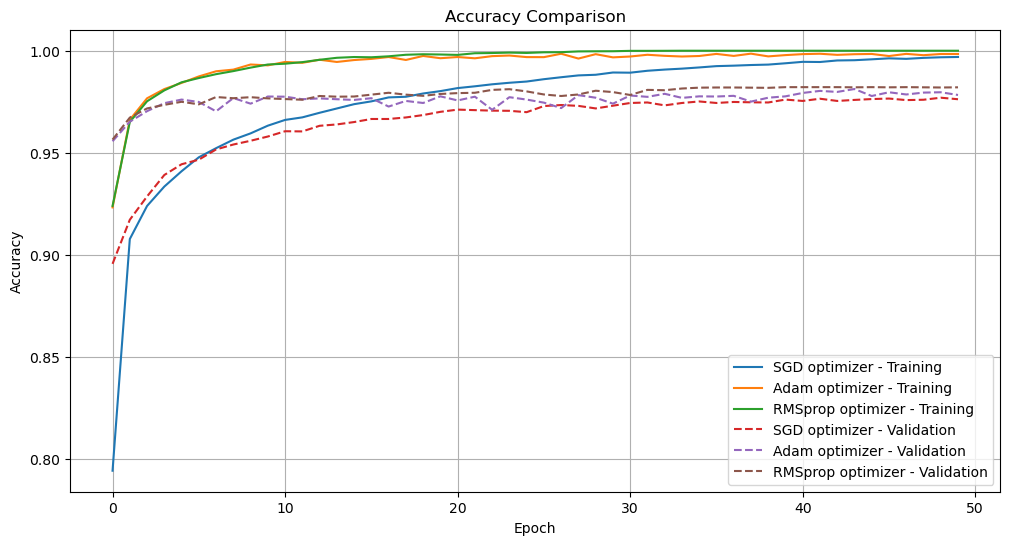

In [51]:
models_data = {
    'SGD optimizer': {
        'history': batch_history,
        'timing': timing_opt.get('sgd', []),
    },
    'Adam optimizer': {
        'history': history_adam,
        'timing': timing_opt.get('adam', []),
    },
    'RMSprop optimizer': {
        'history': history_rmsprop,
        'timing': timing_opt.get('rmsprop', []),
    },
}
# Plotting accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['accuracy'], label=f'{model_name} - Training')

# Plot validation accuracy
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['val_accuracy'], label=f'{model_name} - Validation', linestyle='dashed')

plt.title('Accuracy Comparison')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

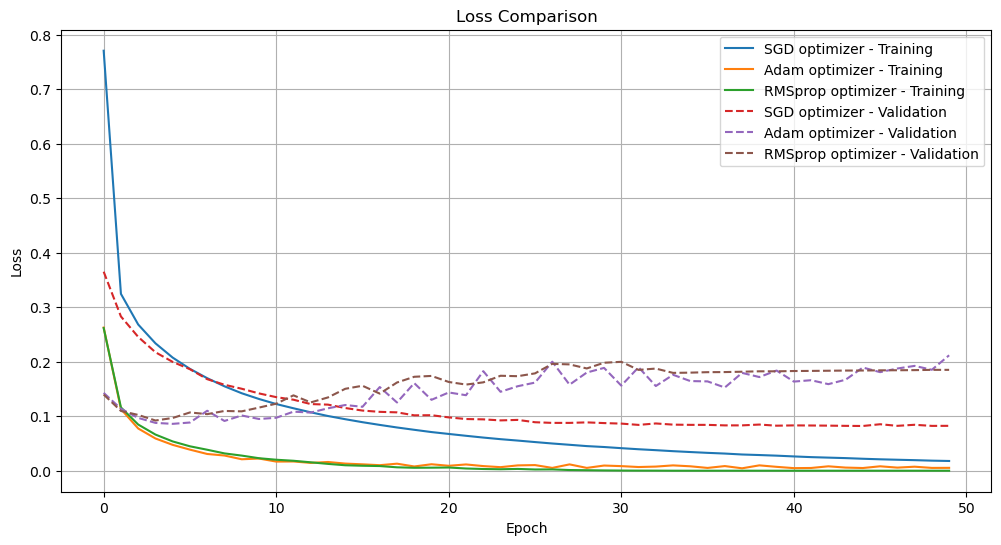

In [52]:
# Plotting loss
plt.figure(figsize=(12, 6))

# Plot training loss
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['loss'], label=f'{model_name} - Training')

# Plot validation loss
for model_name, model_data in models_data.items():
    plt.plot(model_data['history'].history['val_loss'], label=f'{model_name} - Validation', linestyle='dashed')

plt.title('Loss Comparison')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

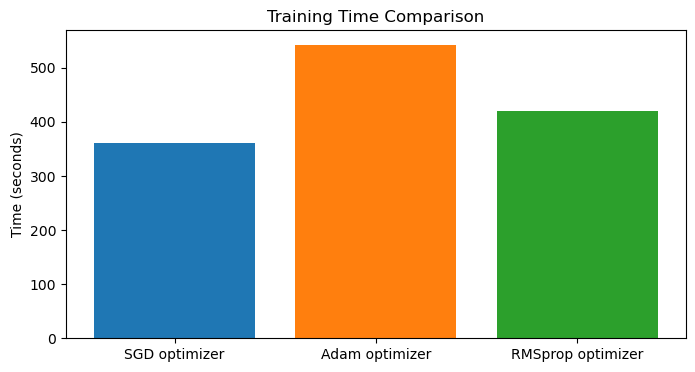

In [53]:
# Plotting timing
plt.figure(figsize=(8, 4))

for model_name, model_data in models_data.items():
    plt.bar(model_name, model_data['timing'])

plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.show()

SGD, Adam, and RmsProp are all `optimization` algorithms used to train neural networks. The main difference between these algorithms is how they update the parameters of the network during training.

- `SGD` updates the parameters based on the gradient of the loss function with respect to the parameters. 

- `Adam` and `RmsProp` both adjust the learning rate dynamically during training. 

Here, we notice that **the learning curves** of `RmsProp` converged rapidly and also got butter performance in terms of `loss` and `accuracy`, However `ADAM` & `SGD` were slow to converge (even though RmsProp got a slightly better results than SGD in terms of `Accuracy` and `Loss`) therefor got a `worse` performance compared to the `RmsProp`.


When it cames to **Learning time** we observe that `SGD` owened the `best` learn time.


In conclusion, SGD outperformed Adam and RmsProp in terms of faster convergence, and shorter learning time. While RmsProp showed The best performance in validation loss.

## 7- Exporting/Import RMSprop Model & Predict

In [54]:
model_rmsprop.save('models/finalized_model')

INFO:tensorflow:Assets written to: models/finalized_model\assets


INFO:tensorflow:Assets written to: models/finalized_model\assets


In [55]:
model = keras.models.load_model('models/finalized_model')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

Evaluate on test data


In [56]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


79/79 [==============================] - 1s 5ms/step - loss: 0.1949 - accuracy: 0.9801
test loss, test acc: [0.1948651820421219, 0.9800999760627747]


1/1 [==============================] - 0s 50ms/step


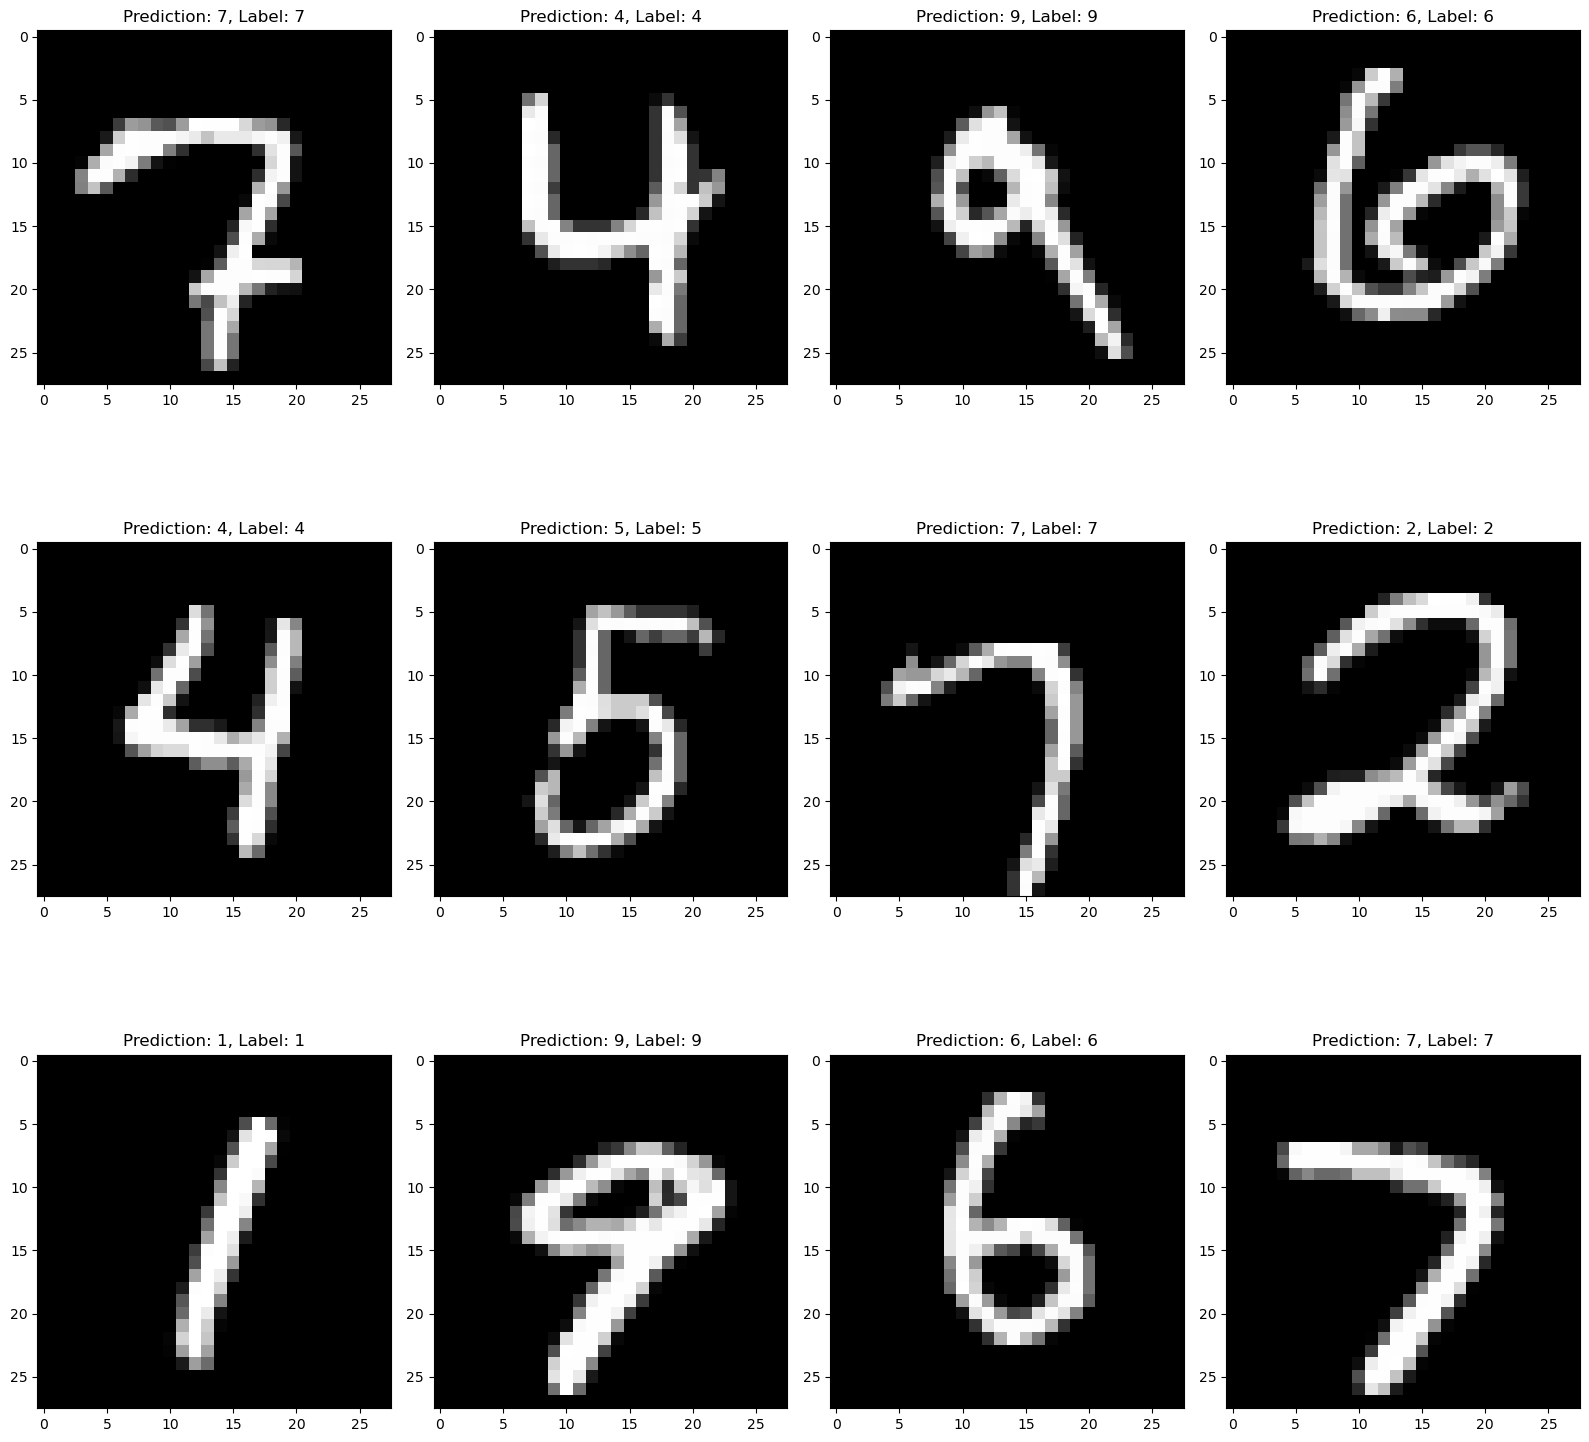

In [57]:
import matplotlib.pyplot as plt
import random

def test_prediction(index, y_test):
    current_image = x_test[index, :, None].T
    prediction = model.predict(x_test[index].reshape(-1,784))
    prediction = np.argmax(prediction)
    label = y_test[index]
    return current_image, prediction, label

test_list = random.sample(range(1, 50),12)
fig, axes = plt.subplots(3, 4, figsize=(16, 16))
axes = axes.ravel()

for i, ax in enumerate(range(len(axes))):
    image, prediction, label = test_prediction(test_list[i], y_test)
    image = image.reshape((28, 28)) * 255
    axes[ax].imshow(image, cmap="gray")
    axes[ax].set_title("Prediction: {}, Label: {}".format(prediction, label))

plt.tight_layout()
plt.show()